# Computer Vision Masterclass - Autoencoders for image compression

## Linear autoencoder

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

### Visualizing the images

In [8]:
np.random.randint(0, 59999)

5312

6


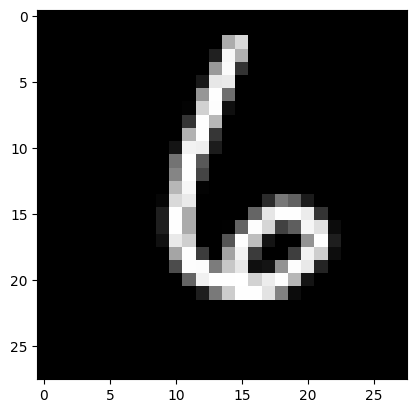

In [9]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [10]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

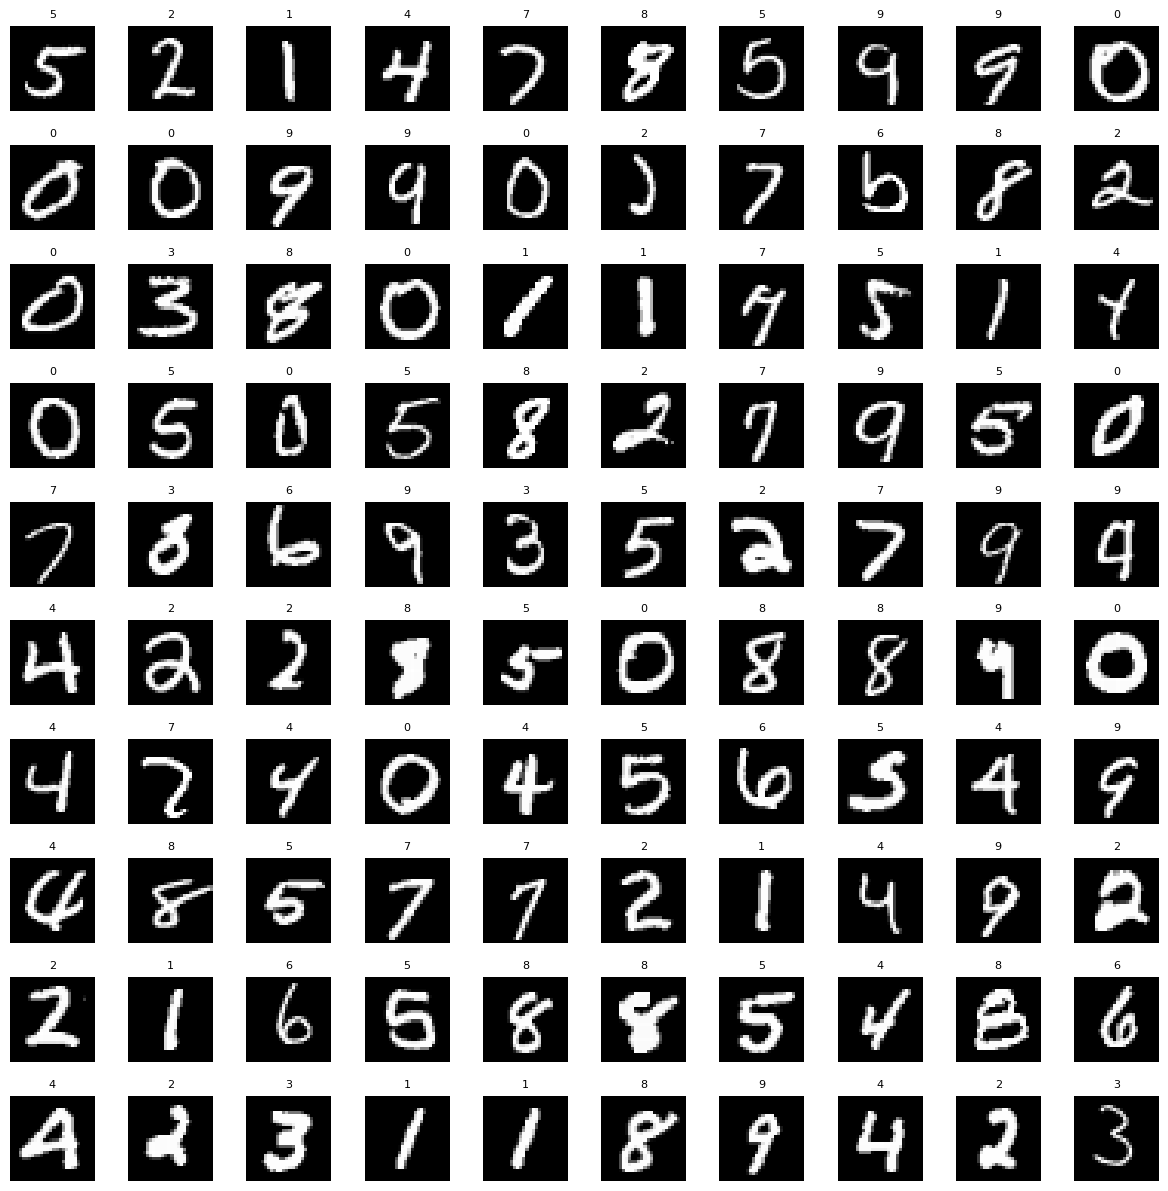

In [11]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15))
#print(axes.shape)
axes = axes.ravel() # -> (10,10) -> [100]
#print(axes.shape)
for i in np.arange(0, width * height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(X_train[index], cmap = 'gray')
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [12]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [18]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the linear autoencoder

In [19]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [20]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [21]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [22]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50


1875/1875 [==============================] - 12s 5ms/step - loss: 0.1548 - accuracy: 0.0110
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1095 - accuracy: 0.0112
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1019 - accuracy: 0.0109
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0978 - accuracy: 0.0125
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0946 - accuracy: 0.0123
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0928 - accuracy: 0.0134
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0914 - accuracy: 0.0128
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0903 - accuracy: 0.0130
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0895 - accuracy: 0.0131
Epoch 10/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.

### Encoding the images

In [25]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [26]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [27]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [28]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [29]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


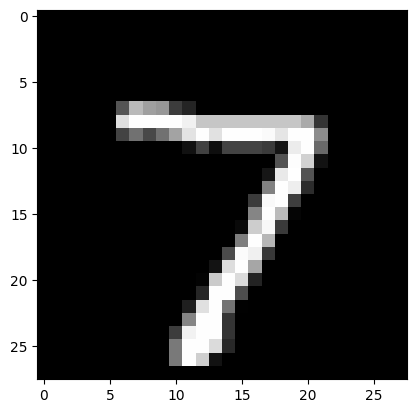

In [30]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

In [31]:
X_test[0].shape

(784,)

In [32]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [33]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 103ms/step


In [34]:
encoded_image, encoded_image.shape

(array([[1.0887372, 2.3862104, 2.2569056, 7.126337 , 4.6661515, 0.       ,
         5.544206 , 3.5920138, 3.3812675, 0.       , 6.441214 , 2.8898954,
         8.89545  , 0.       , 2.4978242, 4.3658533, 1.8820503, 4.4838696,
         2.0954425, 2.254736 , 0.       , 0.       , 2.730671 , 1.2930664,
         3.1249807, 1.4855305, 1.2623327, 0.       , 5.2404003, 7.437569 ,
         0.       , 3.2619658]], dtype=float32),
 (1, 32))

In [35]:
8 * 4

32

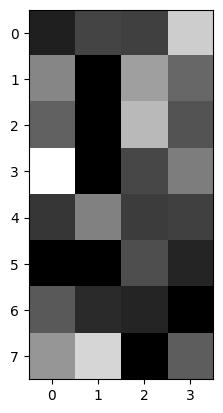

In [36]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

### Decoding the images

In [37]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [38]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 67ms/step


In [40]:
decoded_image.shape

(1, 784)

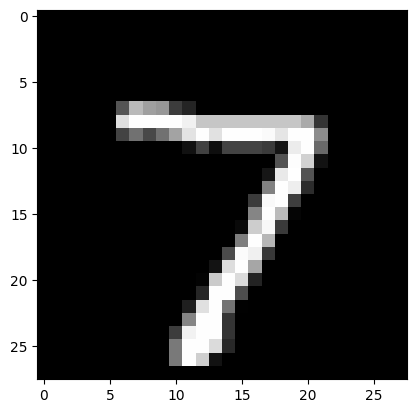

In [41]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray');

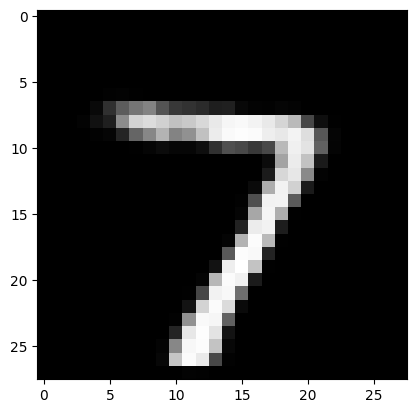

In [42]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray');

### Encoding and decoding the test images

In [43]:
X_test.shape[0] # 9999

10000

1/1 [==============================] - 0s 23ms/step


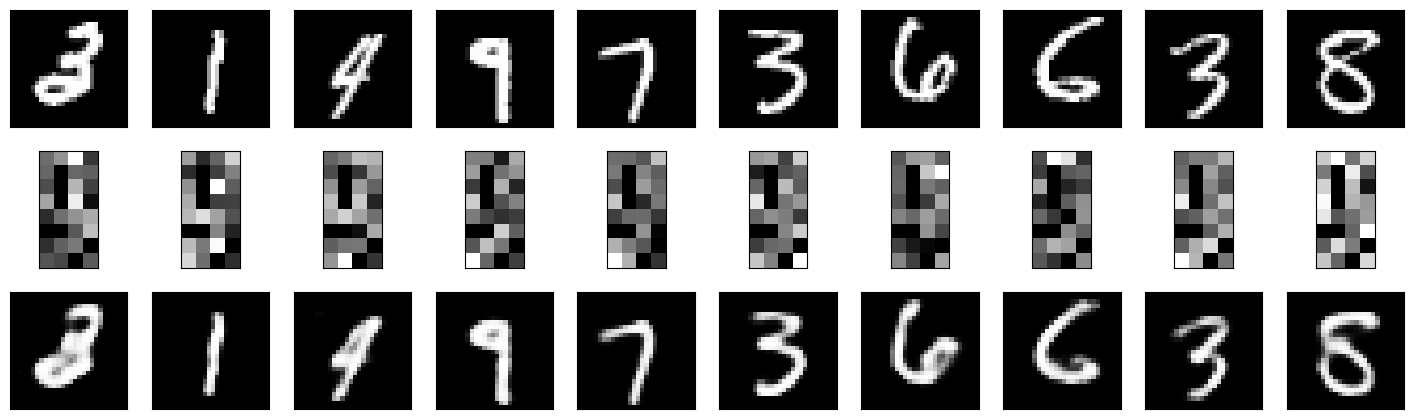

In [44]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  #print(i, image_index)
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

## Convolutional autoencoders

### Importing the libraries

In [45]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

### Loading the dataset

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [46]:
from tensorflow.keras.datasets import fashion_mnist

In [47]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [48]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [49]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Visualizing the images

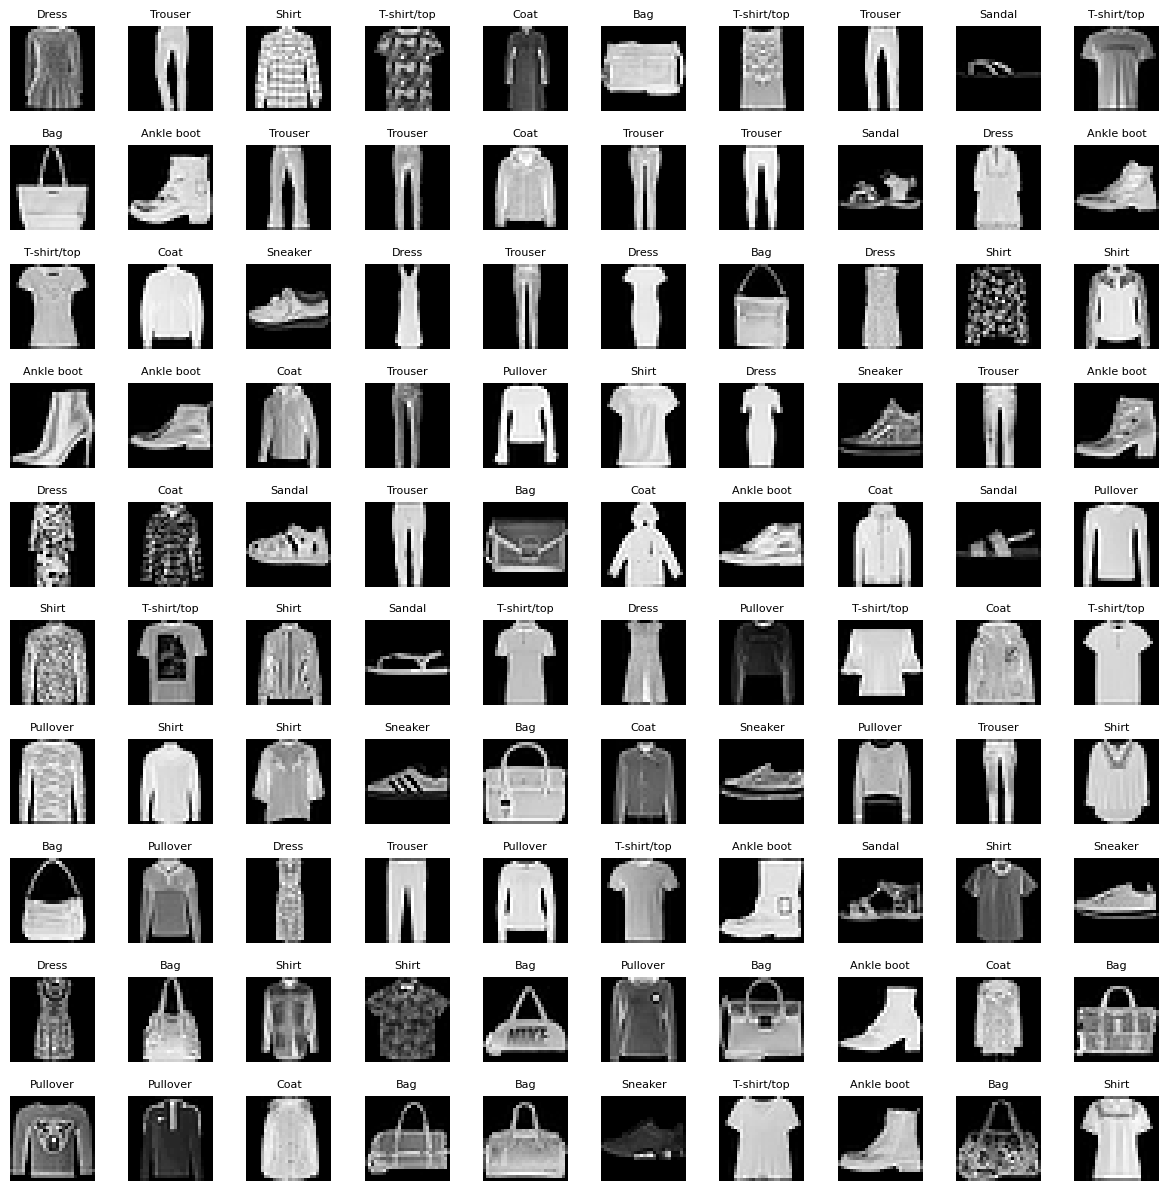

In [50]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(classes[y_train[index]], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [51]:
X_train = X_train / 255
X_test = X_test / 255

In [52]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [53]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

In [54]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Building and training the convolutional autoencoder

In [55]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding = 'same', strides=(2,2)))

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder

autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)             

In [56]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output: (28 - 3 + 1) / 1 = 26 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output: (16 - 3 + 1) / 1 = 14 -> (14, 14, 16)

In [57]:
(28 - 3 + 1) / 1, (16 - 3 + 1) / 1

(26.0, 14.0)

In [58]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [59]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3153 - accuracy: 0.5033
Epoch 2/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2910 - accuracy: 0.5060
Epoch 3/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2866 - accuracy: 0.5065
Epoch 4/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2842 - accuracy: 0.5068
Epoch 5/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2825 - accuracy: 0.5070
Epoch 6/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2809 - accuracy: 0.5072
Epoch 7/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2792 - accuracy: 0.5074
Epoch 8/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2781 - accuracy: 0.5076
Epoch 9/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2772 - accuracy: 0.5077
Epoch 10/50
1875/1875 [==============================] - 20s 10m

### Encoding and decoding the test images

In [60]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)              

In [61]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584 

In [62]:
coded_test_images = encoder.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [63]:
coded_test_images.shape

(10000, 128)

In [64]:
coded_test_images[0]

array([0.42516887, 0.11942028, 0.29230016, 0.34369403, 0.37161383,
       0.5397169 , 0.18000534, 0.10562982, 0.4547155 , 0.24378806,
       0.49578094, 0.49665123, 0.34629375, 0.93044776, 0.0619044 ,
       0.18369752, 0.6879553 , 0.36334518, 0.643535  , 0.4612033 ,
       0.36071247, 0.9519311 , 0.2517148 , 0.39854988, 0.645732  ,
       0.17909533, 0.18332177, 0.3362742 , 0.4041179 , 0.68201864,
       0.40923512, 0.37635285, 0.675161  , 0.40124723, 0.42900062,
       0.43493283, 0.54808   , 0.73350626, 0.24470606, 0.2350289 ,
       1.4054929 , 0.7835768 , 0.92091984, 0.8487214 , 0.50961775,
       1.8260285 , 0.5499094 , 1.5029207 , 1.6012824 , 2.1057684 ,
       0.9164204 , 1.6907438 , 1.153223  , 1.3674351 , 0.732862  ,
       2.5698397 , 1.0776744 , 1.8229359 , 0.5206511 , 1.3450643 ,
       1.3421348 , 0.44730294, 0.772104  , 1.1843408 , 1.1873122 ,
       1.3410788 , 1.4845543 , 1.655219  , 0.37297618, 1.6746708 ,
       0.74743927, 2.2629864 , 1.253065  , 2.072216  , 1.14034

In [65]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

313/313 [==============================] - 2s 5ms/step


(10000, 28, 28, 1)

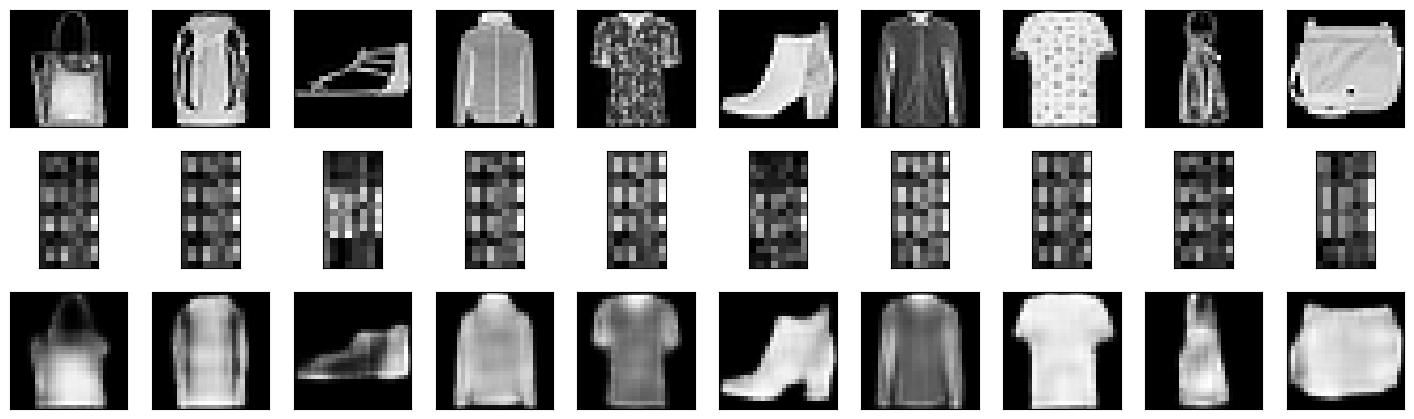

In [66]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10, i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

In [67]:
16 * 8

128